### Name : Srinidhi Murali
### Roll No: D21034

Exercise
1. use the same set of predictors to fit a knn model(choose appropriate values of k using cv)
2. fit Linear regression on same data. Use CV to validate the model
3. Fit decision tree on same data.Use CV to validate the model
4. Choose the best competing models for testing
5. Report the best performing model

GIVE EXPLANATIONS

#### Required Library

In [1]:
import numpy as np
import pandas as pd

#for train-test-split
from sklearn.model_selection import train_test_split

#for fitting regression tree
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LinearRegression

#For cross validation 
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

#To calculate error metrics
from sklearn import metrics


#### Read data

In [2]:
cars = pd.read_csv(r"C:\Users\Admin\Documents\Praxis\IML\Sessions\cars.csv")
cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


In [3]:
#Assigned predictors (X) and target(Y)
X = cars[['Cylinders','Weight','Horsepower']]
y = cars['MPG']

In [4]:
#Separating the data as train,test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)

Data is separated into train, test, validation. CV is used to find best K value in KNN.

In [5]:
#From the train data, separating it as train,validation. 
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.3,random_state=100)

### KNN

In [6]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [7]:
#Specify the k value from range 1-50
neighbors = list(range(1,50))

#Create a list to append cv scores
cv_scores=[]

#Perform cv to choose appropriate k
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn_scores = cross_val_score(knn, X_val, y_val, cv=10, scoring='neg_mean_absolute_error')
    cv_scores.append(knn_scores.mean())


In [8]:
#Average cv score of KNN
np.mean(cv_scores)

-3.618088712516487

In [9]:
#To get absolute value
knn_cv = np.abs(np.mean(cv_scores))
knn_cv

3.618088712516487

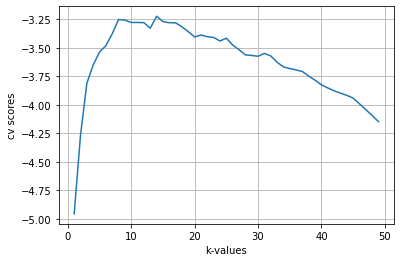

In [10]:
#Plotting K values with cv scores to find which K has the least cv score
plt.plot(neighbors, cv_scores)
plt.xlabel('k-values')
plt.ylabel('cv scores')
plt.grid(which='major',axis='both')
plt.show()

In [22]:
#Using the k value to fit the model with train data
knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=15)

In [23]:
#Predict y
y_pred = knn.predict(X_test)

In [24]:
#Check accuracy score for KNN
knn.score(X_test,y_test)

0.7277984679735571

In [25]:
#To get the error metrics from the actual and predicted y
print("Mean absolute error: ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error: ",metrics.mean_squared_error(y_test,y_pred))
print("Root mean squeared error: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error:  2.783008130081301
Mean squared error:  13.057125745257455
Root mean squeared error:  3.61346450726411


### Linear Regression

In [14]:
#Add object to LR
reg = LinearRegression()

In [15]:
#Used cross_val_score(model,X,y,cv=no.of folds) to find the cv score of X_val, y_val
l_scores = cross_val_score(reg, X_val, y_val, cv=5, scoring='neg_mean_absolute_error')

#average cv score of LinearREression()
print('Avg cv score %2f' %(l_scores.mean()))

Avg cv score -3.642208


In [16]:
#To get absolute value
l_cv = np.abs(l_scores.mean())
l_cv

3.6422080724092702

In [27]:
#Check accuracy score for LinearRegression
reg.score(X_test,y_test)

0.6892101508659892

### Decision Tree

In [17]:
#Add object , define max_depth which is the no. of partitions
dt_model = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

In [18]:
#Get cv score
dt_scores = cross_val_score(dt_model, X_val, y_val, cv=5, scoring='neg_mean_absolute_error')

#average cv score of DecisionTree
print('Avg cv score %2f' %(dt_scores.mean()))

Avg cv score -4.098839


In [19]:
#To get absolute value
dt_cv = np.abs(dt_scores.mean())
dt_cv

4.098839007629797

In [29]:
#Fitting the decisiontree model
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

In [30]:
#Predicting y values
dt_ypred = dt_model.predict(X_test)

In [31]:
#Check accuracy score for decision tree
dt_model.score(X_test,y_test)

0.7125182244081641

### 4. Choose the best model

1. On comparing the 3 models based on cv score(with scoring='mean_absolute_value'), KNN model has the least and so it does perform better than the Linear regression and Decision tree model

2. On comparing based on accuracy score, KNN performs better than LinearRegression and DecisionTree models

a. KNN = 0.727798

b. DecisionTree = 0.712518

c. LinearRegression = 0.689210

### 5. Report the best performing model

For KNN, taking K value from a range between 1-50 and plotting on a graph,its seen k=15 to be providing more accurate results. Fitted the model using KNN(K-15), and predicted the y values. The error metrics are:
1. Mean absolute error:  2.783008130081301
2. Mean squared error:  13.057125745257455
3. Root mean squeared error:  3.61346450726411

Further, for test score KNN has 72% accuracy